In [28]:
#execute this file to analysis overhead of fuzzer containers

In [29]:
from casefc.fscve_step1_db_overhead import session_overhead, OverheadRecord
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# overhead history every ten minutes
query_overhead = session_overhead.query(OverheadRecord)
fuzzer_containers = [result.container_name for result in query_overhead ]
array_cpu_usage = [result.cpu_usage for result in query_overhead ]
array_mem_used = [result.mem_used for result in query_overhead ]
array_mem_total = [result.mem_total for result in query_overhead ]
array_mem_usage = [result.mem_usage for result in query_overhead ]
array_netin = [result.netin for result in query_overhead ]
array_netout = [result.netout for result in query_overhead ]
array_diskin = [result.diskin for result in query_overhead ]
array_diskout = [result.diskout for result in query_overhead ]
array_pids = [result.pids for result in query_overhead ]
array_record_time = [result.record_time for result in query_overhead ]

fuzzer_set = set(fuzzer_containers)  #all of the fuzzers
last_time = session_overhead.query(OverheadRecord.record_time).order_by(OverheadRecord.record_time.desc()).first()  # maxtime
# from start recording ,Second as unit
# print(last_time.keys())
last_time = last_time['record_time']

dict_overhead = {"fuzzer_container":fuzzer_containers,"cpu_usage":array_cpu_usage,"mem_used":array_mem_used,"mem_total":array_mem_total,"mem_usage":array_mem_usage,"netin":array_netin,"netout":array_netout,"diskin":array_diskin,"diskout":array_diskout,"pids":array_pids,"record_time":array_record_time}
df_overhead = pd.DataFrame(dict_overhead)
# print(df_overhead)
# df_edge_coverage.reset_index()
# df_edge_coverage.set_index("time")
path_overhead_csv = "csv/fscve_overhead.csv"
df_overhead.to_csv(path_overhead_csv)


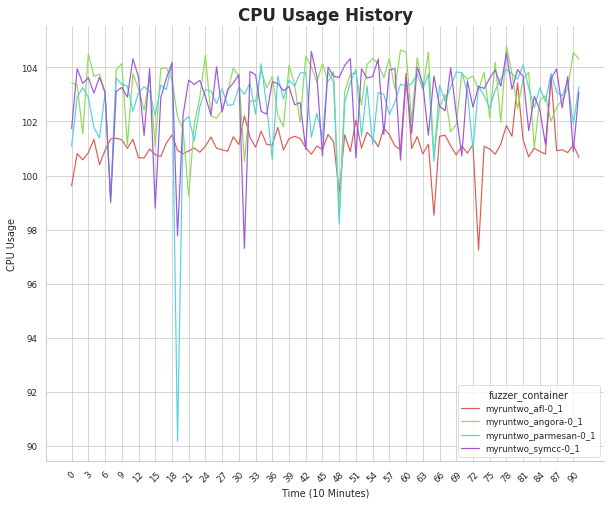

In [30]:
plt.figure(figsize=(last_time//9,8))
sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_palette(sns.color_palette("hls", len(fuzzer_set)))
sns.lineplot(x="record_time", y="cpu_usage", hue="fuzzer_container",data=df_overhead)
# sns.lineplot(x="time", y="edges_count",data=df_edge_coverage)
sns.despine()

plt.xticks(ticks=range(0,last_time+1,3),rotation = 45)
# plt.yticks(ticks=range(0,round(array_cpu_usage[-1]),5))
plt.xlabel("Time (10 Minutes)")
plt.ylabel("CPU Usage")
plt.title('CPU Usage History',fontsize='xx-large', fontweight='heavy')
plt.savefig("image/fscve_cpu_usage_history.svg")
plt.show()

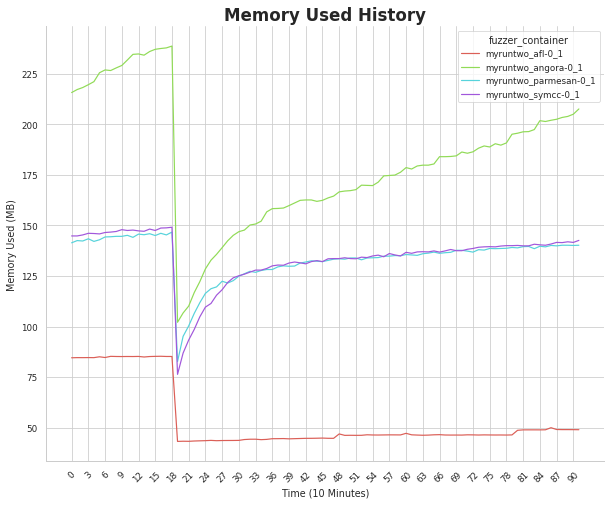

In [31]:
plt.figure(figsize=(last_time//9,8))
sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_palette(sns.color_palette("hls", len(fuzzer_set)))
sns.lineplot(x="record_time", y="mem_used", hue="fuzzer_container",data=df_overhead)
# sns.lineplot(x="time", y="edges_count",data=df_edge_coverage)
sns.despine()


plt.xticks(ticks=range(0,last_time+1,3),rotation = 45)
# plt.yticks(ticks=range(0,int(max(array_mem_used)),5))
plt.xlabel("Time (10 Minutes)")
plt.ylabel("Memory Used (MB)")
plt.title('Memory Used History',fontsize='xx-large', fontweight='heavy')
plt.savefig("image/fscve_mem_used_history.svg")
plt.show()

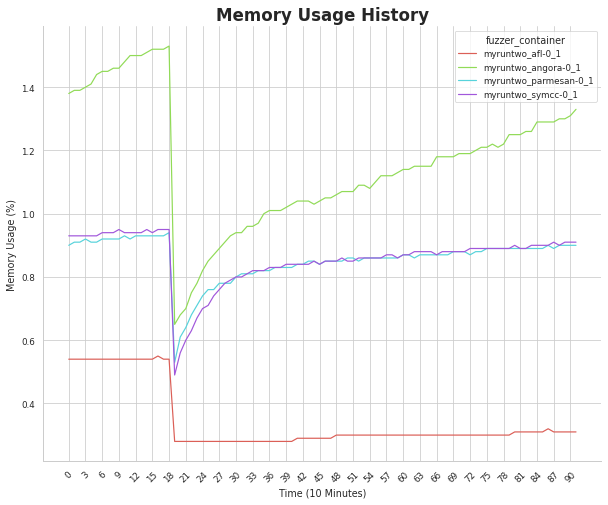

In [32]:
plt.figure(figsize=(last_time//9,8))
sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_palette(sns.color_palette("hls", len(fuzzer_set)))
sns.lineplot(x="record_time", y="mem_usage", hue="fuzzer_container",data=df_overhead)
# sns.lineplot(x="time", y="edges_count",data=df_edge_coverage)
sns.despine()

plt.xticks(ticks=range(0,last_time+1,3),rotation = 45)
# plt.yticks(ticks=range(0,int(max(array_mem_used)),5))
plt.xlabel("Time (10 Minutes)")
plt.ylabel("Memory Usage (%)")
plt.title('Memory Usage History',fontsize='xx-large', fontweight='heavy')
plt.savefig("image/fscve_mem_usage_history.svg")
plt.show()

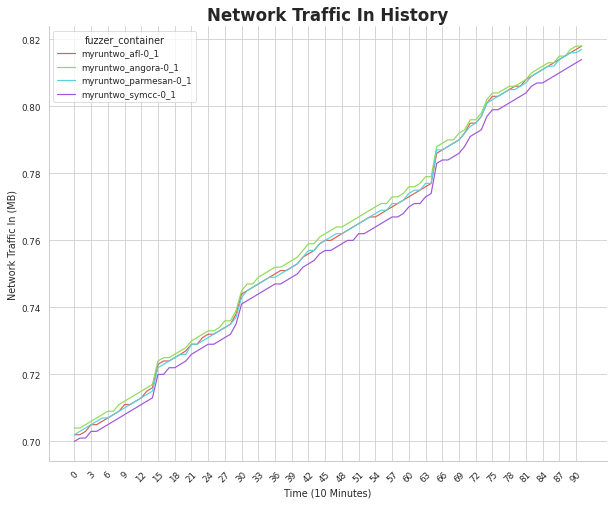

In [33]:
plt.figure(figsize=(last_time//9,8))
sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_palette(sns.color_palette("hls", len(fuzzer_set)))
sns.lineplot(x="record_time", y="netin", hue="fuzzer_container",data=df_overhead)
# sns.lineplot(x="time", y="edges_count",data=df_edge_coverage)
sns.despine()

plt.xticks(ticks=range(0,last_time+1,3),rotation = 45)
# plt.yticks(ticks=range(0,int(max(array_mem_used)),5))
plt.xlabel("Time (10 Minutes)")
plt.ylabel("Network Traffic In (MB)")
plt.title('Network Traffic In History',fontsize='xx-large', fontweight='heavy')
plt.savefig("image/fscve_netin_history.svg")
plt.show()

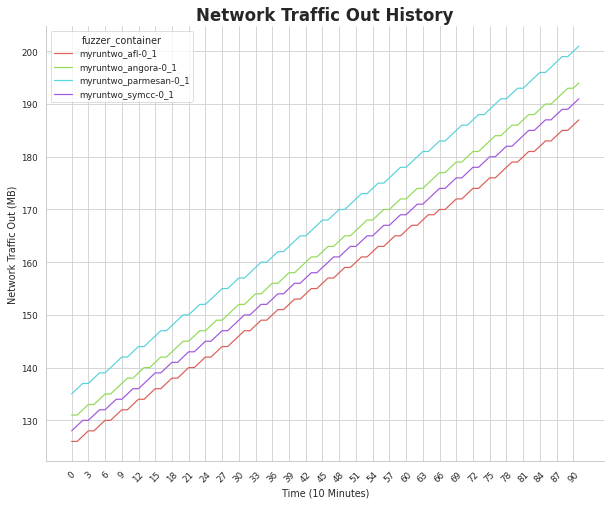

In [34]:
plt.figure(figsize=(last_time//9,8))
sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_palette(sns.color_palette("hls", len(fuzzer_set)))
sns.lineplot(x="record_time", y="netout", hue="fuzzer_container",data=df_overhead)
# sns.lineplot(x="time", y="edges_count",data=df_edge_coverage)
sns.despine()

plt.xticks(ticks=range(0,last_time+1,3),rotation = 45)
# plt.yticks(ticks=range(0,int(max(array_mem_used)),5))
plt.xlabel("Time (10 Minutes)")
plt.ylabel("Network Traffic Out (MB)")
plt.title('Network Traffic Out History',fontsize='xx-large', fontweight='heavy')
plt.savefig("image/fscve_netout_history.svg")
plt.show()

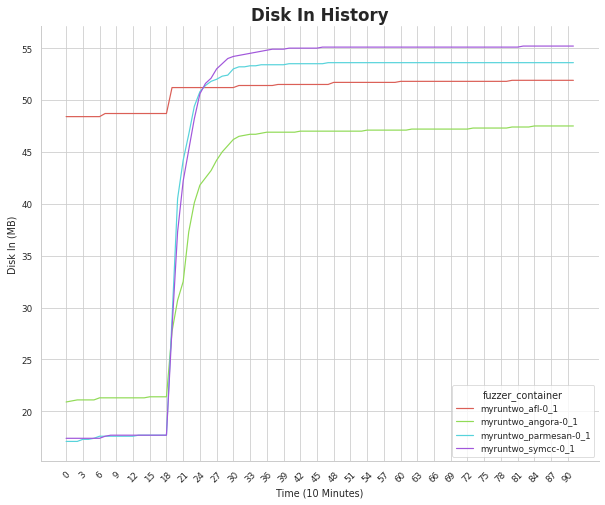

In [35]:
plt.figure(figsize=(last_time//9,8))
sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_palette(sns.color_palette("hls", len(fuzzer_set)))
sns.lineplot(x="record_time", y="diskin", hue="fuzzer_container",data=df_overhead)
# sns.lineplot(x="time", y="edges_count",data=df_edge_coverage)
sns.despine()

plt.xticks(ticks=range(0,last_time+1,3),rotation = 45)
# plt.yticks(ticks=range(0,int(max(array_mem_used)),5))
plt.xlabel("Time (10 Minutes)")
plt.ylabel("Disk In (MB)")
plt.title('Disk In History',fontsize='xx-large', fontweight='heavy')
plt.savefig("image/fscve_diskin_history.svg")
plt.show()

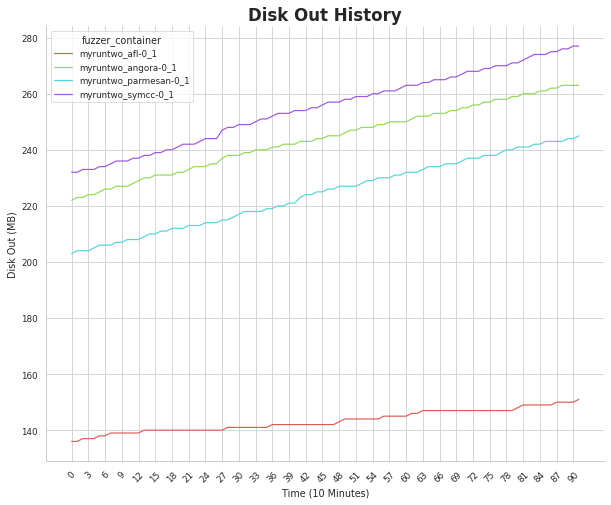

In [36]:
plt.figure(figsize=(last_time//9,8))
sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_palette(sns.color_palette("hls", len(fuzzer_set)))
sns.lineplot(x="record_time", y="diskout", hue="fuzzer_container",data=df_overhead)
# sns.lineplot(x="time", y="edges_count",data=df_edge_coverage)
sns.despine()

plt.xticks(ticks=range(0,last_time+1,3),rotation = 45)
# plt.yticks(ticks=range(0,int(max(array_mem_used)),5))
plt.xlabel("Time (10 Minutes)")
plt.ylabel("Disk Out (MB)")
plt.title('Disk Out History',fontsize='xx-large', fontweight='heavy')
plt.savefig("image/fscve_diskout_history.svg")
plt.show()